Models for:

1. **Naive baseline**: corpus-wide prediction of 'disagreement' based on counts of negative words in text segment > threshold
2. **Sentence embedding baseline**: corpus-wide prediction of 'disagreement' based on cosine similarity to averaged negative disagreement embedding
3. **Sentence embedding + stance baseline**

# Data preparation:

Creating matrix of word frequencies for each podcast episode (rows of matrix are text transcript chunks; columns are each set of words in the lexicon, e.g. analytic negation, etc.)

In [23]:
# Imports
import seaborn as sns
#from annotation_utils import tp, get_union
#from transcript_classes import *
import pandas as pd
from tqdm import tqdm
import sys, os
import pickle

In [24]:
# import common analysis functions we've defined
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)

from common.annotation_utils import tp, get_union
from common.transcript_utils import process_transcript
from common.transcript_classes import *

In [25]:
process_transcript

<function common.transcript_utils.process_transcript(json_filepath, segment_definition='default')>

In [26]:
############################## PARAMS ##############################
# Plotting settings
sns.set(rc = {'figure.figsize':(8,5)})
sns.set_style("white", {'font.family':'serif', 'font.serif':'Times Roman'})
sns.set_context("talk")
sns.set_palette("crest")

# Compiled annotations pickle file, generated from compile_annotations.py script
# ANNOTATIONS_FILEPATH = '../audio_annotation/compiled_annotations_df_connor.pkl'
# TRANSCRIPT_DIRECTORY = '../podcasts-no-audio-13GB/spotify-podcasts-2020/podcasts-transcripts/'

# Define training and test episode ID
# Dog disagreement episode:
TEST_EPISODE_ID = '6hoNS9LR1Lxb4EzMX72kXR'
TEST_JSON_FILEPATH = TRANSCRIPT_DIRECTORY + '4/9/show_49NxrBHUtto19pgLNAJkHY/' + TEST_EPISODE_ID + '.json'

# Second annotated episode:
TRAIN_EPISODE_ID = '79aiOALBohH9vEIUHPAoRj'
TRAIN_JSON_FILEPATH = TRANSCRIPT_DIRECTORY + '6/I/show_6IUuGlrgkNx1yijdVP3FBB/' + TRAIN_EPISODE_ID + '.json'

DOWNLOAD_LEXICON_MATRICES = False

def get_lexicon_matrix(json_filepath, lexicon):
    """Return matrix with counts for each set of words defined in the lexicon dictionary"""
    transcript = Transcript(json_filepath, segment_definition = 'default')
    text_segments = transcript.data['text_chunks']
    X_counts = np.zeros((len(text_segments), len(lexicon)))
    for i, segment in enumerate(text_segments):
        words = segment.lower().split(' ')
        for w in words:
            for j, key in enumerate(lexicon):
                if w in lexicon[key]: X_counts[(i, j)] += 1
    return X_counts

def get_all_lexicon_matrices(root_directory, lexicon):
    """
    Return dictionary with keys ('filepath'), i.e. the filepath to transcript json
    values: lexicon matrices
    """
    num_files = 0
    num_success_files = 0

    corpus_info = {}
    rootDir = TRANSCRIPT_DIRECTORY

    for i in tqdm(os.listdir(rootDir)):
        current_dir = rootDir + i + '/' 
        for dirName, subdirList, fileList in os.walk(current_dir):
            for fname in fileList:
                if '.json' in fname:
                    num_files += 1
                    file_path = os.path.join(dirName, fname)
                    X_counts = get_lexicon_matrix(file_path, lexicon)
                    corpus_info[file_path] = X_counts
                    num_success_files += 1
    print('total files: ',num_files)
    print('total successful: ',num_success_files)
    return corpus_info

# Define lexicon (here, a dictionary of disagreement-related words)
lexicon = {}
lexicon['analytic negation'] = set(['no', 'not'])
lexicon['contraction negation'] = set(['ain’t', 'aren’t', 'arent', 'aren’t', 'can’t', 'cannot', 'cant', 'couldn’t',
                                  'couldnt', 'couldn’t', 'didn’t', 'didnt', 'didn’t', 'doesn’t', 'doesnt', 'doesn’t',
                                  'don’t', 'don´t',
                                  'dont', 'hadn’t', 'hadnt', 'hasn’t', 'hasnt', 'hasn’t', 'haven’t', 'havent',
                                  'haven’t', 'havnt', 'isn’t', 'isnt', 'isn’t', 'mightnt', 'mightn’t', 'mustnt',
                                  'mustn’t', 'n’t', 'n’t', 'shouldn’t', 'shouldn’t', 'shouldnt', 'wasn’t',
                                  'wasnt', 'wasn’t', 'weren’t', 'werent', 'weren’t',
                                  'won’t', 'wont', 'won’t', 'wouldn’t', 'wouldnt', 'wouldn’t'])
lexicon['synthetic negation'] = set(['neither', 'never', 'nor', 'none', 'nobody', 'noone', 'no-one'])
lexicon['synonyms for without'] = set(['sans', 'without', 'w/o'])
lexicon['other'] = set(["disagree", "incorrect", "wrong", "ridiculous", "absurd"])

NameError: name 'TRANSCRIPT_DIRECTORY' is not defined

In [ ]:
def get_lexicon_matrix(json_filepath, lexicon):
    """Return matrix with counts for each set of words defined in the lexicon dictionary"""
    # view the process_transcript for more information on this
    transcript = process_transcript(json_filepath)
    text_segments = transcript['text_chunks']
    # print(text_segments) # gives the text chunks from the transcript (e.g. ["I'm Bill Simmons here...)
    # print(len(text_segments)) # prints number of elements in the list
    X_counts = np.zeros((len(text_segments), len(lexicon))) # creating an array of the number of segments and the lexicon size 
    for i, segment in enumerate(text_segments):
        words = segment.lower().split(' ')
        for w in words:
            for j, key in enumerate(lexicon):
                if w in lexicon[key]:
                    X_counts[(i, j)] += 1
    return X_counts


lexicon = {}
lexicon['bill simmons'] = set(['simmons', 'bill'])
lexicon['negation'] = set(
    ['simmons', 'bill'])  # used as a sanity check here


check = get_lexicon_matrix(
    'show_55R0CZoqgY3hcmCmVkmBig/0AUxUB5ukD9c0APU6l2Gcv.json', lexicon)
print(check.shape)
print(check)
# getting first column
print(check[:,0].sum())
# getting all the values
print(check.sum())


(13, 2)
[[2. 2.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
2.0
4.0


In [39]:
def get_lexicon_matrix(json_filepath, lexicon):
    """Return matrix with counts for each set of words defined in the lexicon dictionary"""
    # view the process_transcript for more information on this
    transcript = process_transcript(json_filepath)
    text_segments = transcript['text_chunks']
    # print(text_segments) # gives the text chunks from the transcript (e.g. ["I'm Bill Simmons here...)
    # print(len(text_segments)) # prints number of elements in the list
    # creating an array of the number of segments and the lexicon size
    X_counts = np.zeros((len(text_segments), len(lexicon)))
    for i, segment in enumerate(text_segments):
        # words = segment.lower().split(' ')
        segment = segment.lower()
        # print(segment) # i'm bill simmons here...
        '''
        for w in words:
            for j, key in enumerate(lexicon):
                if w in lexicon[key]:
                    X_counts[(i, j)] += 1
        '''
        for j, value in enumerate(lexicon):
            # print(j)
            # print(value)
            
            X_counts[(i, j)] += segment.count(value)
        # break
    return X_counts


# lexicon = {}
lexicon = ['simmons', 'bill']
# lexicon['bill simmons'] = set(['simmons', 'bill'])
# lexicon['negation'] = set(['simmons', 'bill'])  # used as a sanity check here


check = get_lexicon_matrix(
    'show_55R0CZoqgY3hcmCmVkmBig/0AUxUB5ukD9c0APU6l2Gcv.json', lexicon)
print(check.shape)
print(check)
# getting first column
print(check[:, 0].sum())
# getting all the values
print(check.sum())


(13, 2)
[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
1.0
2.0


In [27]:
check = "hello I'm in youre inside house"
check.count("in")

2

In [ ]:
def get_all_lexicon_matrices(root_directory, lexicon):
    """
    Return dictionary with keys ('filepath'), i.e. the filepath to transcript json
    values: lexicon matrices
    """
    num_files = 0
    num_success_files = 0

    corpus_info = {}
    rootDir = TRANSCRIPT_DIRECTORY

    for i in tqdm(os.listdir(rootDir)):
        current_dir = rootDir + i + '/'
        for dirName, subdirList, fileList in os.walk(current_dir):
            for fname in fileList:
                if '.json' in fname:
                    num_files += 1
                    file_path = os.path.join(dirName, fname)
                    X_counts = get_lexicon_matrix(file_path, lexicon)
                    corpus_info[file_path] = X_counts
                    num_success_files += 1
    print('total files: ', num_files)
    print('total successful: ', num_success_files)
    return corpus_info


In [3]:
if DOWNLOAD_LEXICON_MATRICES:
    corpus_info = get_all_lexicon_matrices(TRANSCRIPT_DIRECTORY, lexicon)
    # Save the resulting pickle file of counts
    with open('lexicon_matrices.pickle', 'wb') as handle:
        pickle.dump(corpus_info, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    f = open("lexicon_matrices.pickle", "rb")
    corpus_info = pickle.load(f)

# Visualization:

Visualizing distribution of lexicon word counts:

### Segment-level:
Each observation in histogram is a text segment (multiple text segments for a podcast episode, multiple podcast episodes):

(8429540, 4)


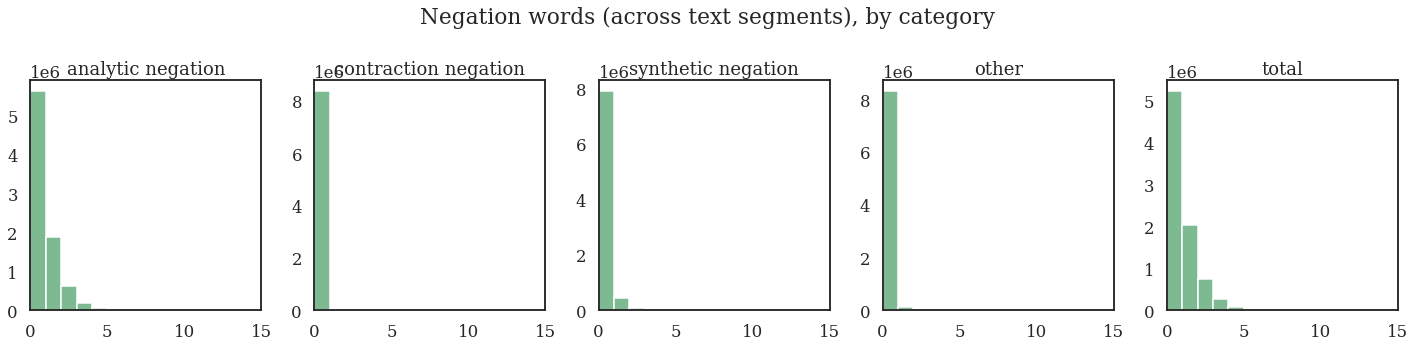

In [5]:
# Segment-level plots
all_lexicon_matrices = np.vstack(list(corpus_info.values()))

# Exclude "synonyms for without" (since likely won't capture any meaningful disagreement)
all_lexicon_matrices = np.delete(all_lexicon_matrices, -2, axis=1) 
lexicon.pop('synonyms for without', None)
print(all_lexicon_matrices.shape)

fig, axes = plt.subplots(1, len(lexicon)+1, figsize = (20,5))
ax_flat = axes.flat

for idx, key in enumerate(lexicon):
    counts = all_lexicon_matrices[:,idx]
    ax_flat[idx].hist(counts, bins=np.arange(counts.min(), counts.max()+1))
    ax_flat[idx].set_title(key)
    ax_flat[idx].set_xlim((0,15))

fig.suptitle('Negation words (across text segments), by category')
fig.tight_layout()

all_counts = all_lexicon_matrices.sum(axis=1)
ax_flat[len(lexicon)].hist(all_counts, bins=np.arange(all_counts.min(), all_counts.max()+1))
ax_flat[len(lexicon)].set_title("total")
ax_flat[len(lexicon)].set_xlim((0,15))
plt.tight_layout();

### Episode-level:
Each observation in histogram is a podcast episode (aggregating counts across segments within episode):

(105360, 4)


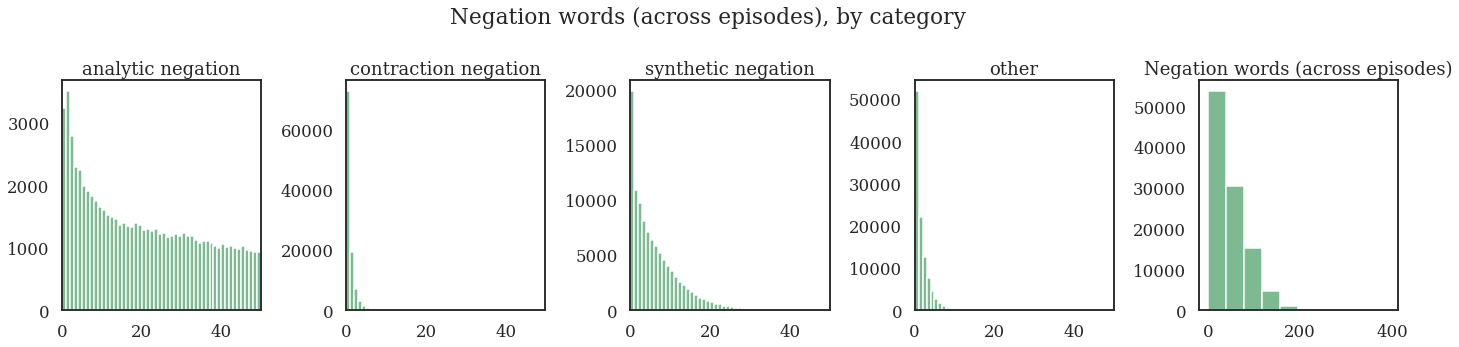

In [6]:
# Episode-level plots (distribution across episodes)
episode_lexicon_counts = np.vstack([v.sum(axis=0) for v in corpus_info.values()])
episode_lexicon_counts = np.delete(episode_lexicon_counts, -2, axis=1)
print(episode_lexicon_counts.shape)

fig, axes = plt.subplots(1, len(lexicon)+1, figsize = (20,5))
ax_flat = axes.flat

for idx, key in enumerate(lexicon):
    counts = episode_lexicon_counts[:,idx]
    ax_flat[idx].hist(counts, bins=np.arange(counts.min(), counts.max()+1))
    ax_flat[idx].set_title(key)
    ax_flat[idx].set_xlim((0,50))
    
fig.suptitle('Negation words (across episodes), by category')
fig.tight_layout()

all_episode_counts = episode_lexicon_counts.sum(axis=1)
ax_flat[len(lexicon)].hist(all_episode_counts)
ax_flat[len(lexicon)].set_title("Negation words (across episodes)")
plt.tight_layout();

## Naive count-based model

Hypothesis: text segments with many negation words from lexicon are likely to contain disagreement.

#### Results from 'dog-disagreement' episode:

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

# Load annotations
annot_df = pd.read_pickle(ANNOTATIONS_FILEPATH)

# Prepare test data
test_union_ranges = get_union(annot_df, TEST_EPISODE_ID)
test_transcript = Transcript(TEST_JSON_FILEPATH, segment_definition = 'default')
test_text_times = [tp(i[0], i[1]) for i in test_transcript.data['text_chunks_times']]
X_test = get_lexicon_matrix(TEST_JSON_FILEPATH, lexicon)
y_test = 1*np.array([any([t in r for r in test_union_ranges]) for t in test_text_times])

In [8]:
display(pd.DataFrame(X_test[-30:-20], columns = lexicon.keys(), dtype=int))

,analytic negation,contraction negation,synthetic negation,other
0,2,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,5,0,0,0
5,0,0,0,0
6,2,0,0,0
7,0,0,0,0
8,3,0,1,1
9,1,0,0,0


In [9]:
# Text chunk from index -25 onwards corresponds to past the 40 minute (2400 seconds) mark:
print(test_transcript.data['text_chunks_times'][-25])

(2375.9, 2404.5)


In [10]:
THRESHOLD = 2
NO_THRESHOLD = 1

In [11]:
# [:,0] indexes the 0th entry of the lexicon (i.e. the below means classifying based on "no / not" > 0)
y_test_pred = (X_test[-25:][:,0] > NO_THRESHOLD)
print(classification_report(y_test[-25:], y_test_pred))
print(f"Predicted: {sum(y_test_pred)}")
print(f"Actual: {sum(y_test[-25:])}")
print(np.array(test_transcript.data['text_chunks'][-25:])[y_test_pred])

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.50      0.67         6

    accuracy                           0.88        25
   macro avg       0.93      0.75      0.80        25
weighted avg       0.90      0.88      0.86        25

Predicted: 3
Actual: 6
[" Yes, I get the dog. Oh, really? Wow, you were not a dog person until like a year ago. And is that is such a false narrative about me. We got wait a family dog for 10 years when you met Maverick you were like, I'm you told me that have me having a dog was a deal breaker. Yeah, because single girls with dogs, I have a major issue and what's your issue? This is for another time though. It's not is the perfect time single girls."
 " If anything that is like not slightly Gary, you know that I'm right they keep a dog in this little tiny ass apartment. They never take it for walks because they're alone and can't find a boyfriend. It's not the dog

In [12]:
# Looking only from where we annotated in the dog episode
y_test_pred = (X_test[-25:].sum(axis=1)>THRESHOLD)
print(classification_report(y_test[-25:], y_test_pred))
print(f"Predicted: {sum(y_test_pred)}")
print(f"Actual: {sum(y_test[-25:])}")
print(np.array(test_transcript.data['text_chunks'][-25:])[y_test_pred])

              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25

Predicted: 2
Actual: 6
[" If anything that is like not slightly Gary, you know that I'm right they keep a dog in this little tiny ass apartment. They never take it for walks because they're alone and can't find a boyfriend. It's not the dog's fault. You're a fucking loser. That is not first of all, are you are you saying? That's what I am. No, you're just laughing because he knows it's true. No, it's just the most ridiculous tape."
 " You are an exception. Most people get animals for selfish reasons. It's not an exception though. I'm just an average normal person. Like I'm not an exceptionally not. Oh my gosh. I'm talking you up, but you're talking other women down

#### Results from other annotated episode:

In [13]:
# Prepare train data
train_union_ranges = get_union(annot_df, TRAIN_EPISODE_ID)
train_transcript = Transcript(TRAIN_JSON_FILEPATH, segment_definition = 'default')
train_text_times = [tp(i[0], i[1]) for i in train_transcript.data['text_chunks_times']]
X_train = get_lexicon_matrix(TRAIN_JSON_FILEPATH, lexicon)
y_train = 1*np.array([any([t in r for r in train_union_ranges]) for t in train_text_times])

In [14]:
# Another annotated podcast
# [:,0] indexes the 0th entry of the lexicon (i.e. the below means classifying based on analytic negation > 0)
y_train_pred = (X_train[:,0] > NO_THRESHOLD)
print(classification_report(y_train, y_train_pred))
print(f"Predicted: {sum(y_train_pred)}")
print(f"Actual: {sum(y_train)}")

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        91
           1       0.27      0.29      0.28        14

    accuracy                           0.80       105
   macro avg       0.58      0.58      0.58       105
weighted avg       0.81      0.80      0.80       105

Predicted: 15
Actual: 14


In [15]:
y_train_pred = (X_train.sum(axis=1)>THRESHOLD)
print(classification_report(y_train, y_train_pred))
print(f"Predicted: {sum(y_train_pred)}")
print(f"Actual: {sum(y_train)}")

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        91
           1       0.33      0.14      0.20        14

    accuracy                           0.85       105
   macro avg       0.61      0.55      0.56       105
weighted avg       0.81      0.85      0.82       105

Predicted: 6
Actual: 14


# Embedding model

Hypothesis: segments w/ embeddings “near” disagreement embeddings → higher prob. of disagreement

In [484]:
VECTORIZER = 'sbert'
NORMALIZE_VECTORS = False
TRUNCATE = False

if VECTORIZER == 'word':
    # Load Google pre-trained Word2Vec word embeddings
    import gensim
    gnews_dict = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
    gnews_vectorizer = WordEmbeddingVectorizer(embedding_dict = gnews_dict, 
                                               embedding_dim = 300, 
                                               lemmatize = True, remove_stopwords = False, n_token_filter = 0)
    train_transcript.set_segment_vectors(gnews_vectorizer)
    test_transcript.set_segment_vectors(gnews_vectorizer)
elif VECTORIZER == 'sbert':
    from sentence_transformers import SentenceTransformer, util
    model = SentenceTransformer('all-MiniLM-L6-v2', device = 'cuda')
    sbert_vectorizer = SBERTVectorizer(model, normalize = NORMALIZE_VECTORS, truncate = TRUNCATE)
    train_transcript.set_segment_vectors(sbert_vectorizer)
    test_transcript.set_segment_vectors(sbert_vectorizer)

In [485]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

# 1 if we annotated the time period (we looked at minute 40 onwards)
annotated_mask = 1*(np.array([i.start for i in test_text_times]) > (60*40))

labels = []
for i in range(len(y_test)):
    # listened to the clip, but didn't annotate as disagreement
    if (y_test[i]==0 and annotated_mask[i]==1):
        labels.append(0)
    # didn't listen to the clip
    elif annotated_mask[i]==0:
        labels.append(1)
    # listened and annotated as disagreement
    elif (y_test[i]==1 and annotated_mask[i]==1):
        labels.append(2)

def visualize_embeddings(embeddings, reducer, label_colors, labels, label_legend, title, text_labels):
    embeddings = StandardScaler().fit_transform(embeddings)
    X = reducer.fit_transform(embeddings)
    plt.figure(figsize = (20,10))
    plt.scatter(X[:,0], X[:,1], c = label_colors[labels])
    
    patches = []
    for idx, l in enumerate(label_colors):
        patch = mpatches.Patch(color=label_colors[idx], label=label_legend[idx])
        patches.append(patch)
    plt.legend(handles=patches)
    plt.title(title)
    for i, txt in enumerate(text_labels):
        plt.annotate('\n'.join([txt[:30][i:i+10] for i in range(0, 30, 10)]), 
                     (X[:,0][i], X[:,1][i]), fontsize = 8);

In [486]:
reducer = umap.UMAP(random_state = 1)
#reducer = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', random_state = 0)
#reducer = PCA(n_components=2)
reducer_label = "UMAP"

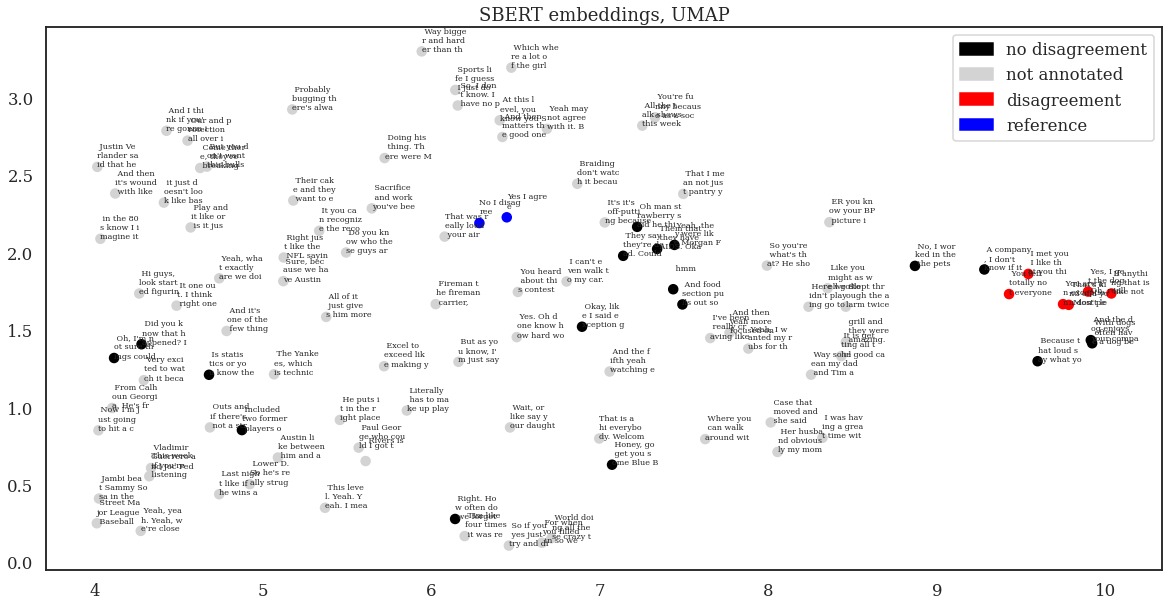

In [487]:
# Convert some example sentences for EDA purposes
eda_sentences = ["No I disagree", "Yes I agree"]

if VECTORIZER == 'word':
    eda_embeddings, _ = gnews_vectorizer.vectorize(eda_sentences)
    vectorizer_label = 'Word vector'
else:
    eda_embeddings = model.encode(eda_sentences, normalize_embeddings = NORMALIZE_VECTORS)
    vectorizer_label = 'SBERT'
    
all_embeddings = np.vstack([test_transcript.segment_vectors, eda_embeddings])

eda_labels = [3] * len(eda_embeddings)
all_labels = labels.copy()
all_labels.extend(eda_labels)

# Params for plot
label_colors = np.array(['black', 'lightgray', 'red', 'blue'])
label_legend = ['no disagreement', 'not annotated', 'disagreement', 'reference']
title = f'{vectorizer_label} embeddings, {reducer_label}'
text_labels = test_transcript.data['text_chunks']+eda_sentences

visualize_embeddings(all_embeddings, reducer, label_colors, all_labels, label_legend, title, text_labels)

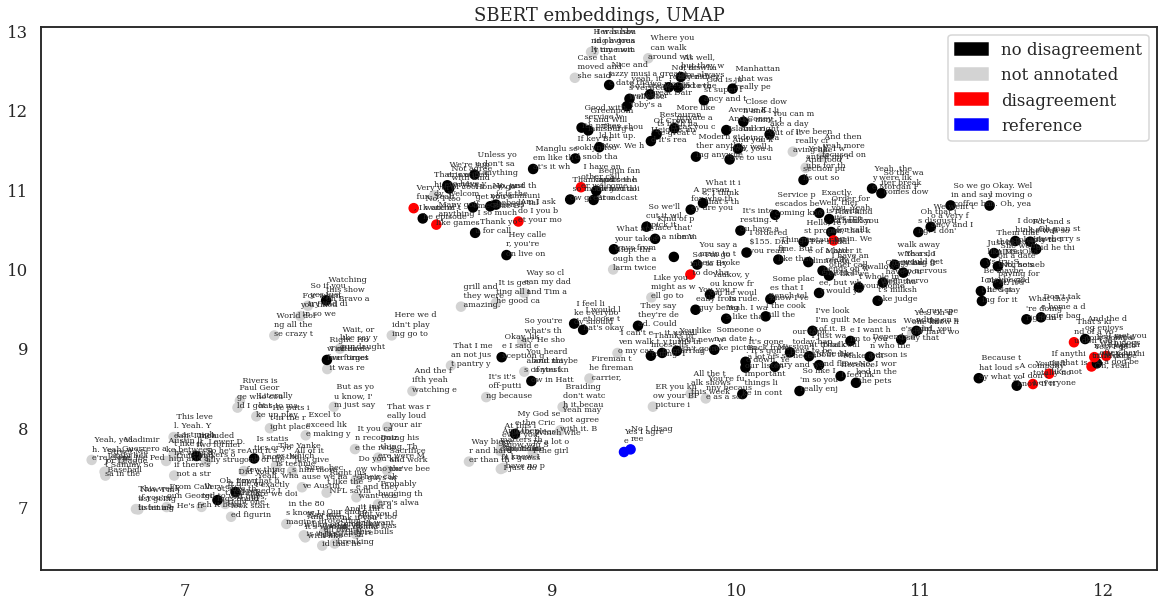

In [488]:
# Params for plot
label_colors = np.array(['black', 'lightgray', 'red', 'blue'])
label_legend = ['no disagreement', 'not annotated', 'disagreement', 'reference']
title = f'{vectorizer_label} embeddings, {reducer_label}'
text_labels = test_transcript.data['text_chunks']+train_transcript.data['text_chunks']+eda_sentences
all_labels = labels.copy()
all_labels.extend([0 if i==0 else 2 for i in y_test])
all_labels.extend(eda_labels)

visualize_embeddings(np.vstack([test_transcript.segment_vectors, 
                                train_transcript.segment_vectors, 
                                eda_embeddings]),
                     reducer, 
                     label_colors, 
                     all_labels,
                     label_legend, title, text_labels);

In [489]:
# Inspecting entries from the dog podcast episode which were annotated as 'disagree'
np.array(test_transcript.data['text_chunks'])[y_test.astype(bool)]

array([" Yes, I get the dog. Oh, really? Wow, you were not a dog person until like a year ago. And is that is such a false narrative about me. We got wait a family dog for 10 years when you met Maverick you were like, I'm you told me that have me having a dog was a deal breaker. Yeah, because single girls with dogs, I have a major issue and what's your issue? This is for another time though. It's not is the perfect time single girls.",
       " If anything that is like not slightly Gary, you know that I'm right they keep a dog in this little tiny ass apartment. They never take it for walks because they're alone and can't find a boyfriend. It's not the dog's fault. You're a fucking loser. That is not first of all, are you are you saying? That's what I am. No, you're just laughing because he knows it's true. No, it's just the most ridiculous tape.",
       " You left totally not everyone out. There is agreeing with me. They're in my tweet me at Chris Braman and tell me you agree with me 

In [490]:
# Inspecting entries from the other annotated podcast episode which were annotated as 'disagree'
np.array(train_transcript.data['text_chunks'])[y_train.astype(bool)][:5]

array([" and maybe if you know in Hatton as well, maybe then one month see one Long Island. Whoo, let's go through maybe some underrated overrated within each each boil. Now what we don't want to put her on the spot now with over you not also just all right fine. I don't know because you know what? I wouldn't even mention overrated places because they're not underrated. Yeah under yeah under it it definitely but over it it because they don't deserve the mention. So well Cole. Yeah agreed agreed. Why would you want to you know, we might as well just you know promote leaders that are",
       " Of Crown Heights and it's really really really good. Everything every dish there is unique and different. What is it Dairy meat me me, and I'm like never heard of a neat neat. Yeah out of your budget is about $9. What of she pays for itself? Oh, okay. So, okay good now that's yeah, maybe something more in Flatbush. So in Flatbush, it's very difficult because in Flatbush, they used to be really goo

In [491]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

def get_nearby(threshold, embeddings, query_vector, method = 'cosine'):
    if method == 'cosine':
        scores = cosine_similarity(query_vector, embeddings).reshape(-1)
        return (scores > threshold)
    elif method == 'euclidean':
        scores = euclidean_distances(query_vector, embeddings).reshape(-1)
        return (np.abs(scores) < threshold)

In [492]:
THRESHOLD = 0.2
QUERY = "No I disagree."

if VECTORIZER == 'word':
    query_vector, _ = gnews_vectorizer.vectorize([QUERY])
elif VECTORIZER == 'sbert':
    query_vector = model.encode([QUERY], normalize_embeddings = NORMALIZE_VECTORS)

y_test_pred = get_nearby(THRESHOLD, 
                         test_transcript.segment_vectors,
                         query_vector = query_vector, method = 'cosine')
print(classification_report(y_test[-25:], y_test_pred[-25:]))
print(f"Predicted: {sum(y_test_pred[-25:])}")
print(f"Actual: {sum(y_test[-25:])}")

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.67      0.67      0.67         6

    accuracy                           0.84        25
   macro avg       0.78      0.78      0.78        25
weighted avg       0.84      0.84      0.84        25

Predicted: 6
Actual: 6


/home/morrisreeves/anaconda3/envs/morris_capstone/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [493]:
print(np.array(test_transcript.data['text_chunks'])[y_test_pred])

["That was really loud your air horn. I mean Fanfare look at a young age. You're taught to project or no one can hear you or understand you? Okay, and one of us between the two of us one of us is a professional broadcast is Chris Brockman and that their quotes."
 " Do you know who these guys are introduced themselves to these young players show a lot of personality and that's going to help grow the game and yeah, I mean no, but yeah, that's the problem is like people just don't get excited about baseball anymore. Unfortunately, you know, I mean, but that's just the the state of the world that we live in with cell phones and everybody wants everything so fast and yeah when I suppose not about that when I fell in love with baseball, there was three channels and like HBO and ESPN were just starting and but because we're on cable and Mike Tyson was kind of"
 " Doing his thing. There were Michael Jordan was just coming up there weren't there weren't many things to do that. You actually went

In [494]:
y_train_pred = get_nearby(THRESHOLD, 
                          train_transcript.segment_vectors, 
                          query_vector = query_vector)
print(classification_report(y_train, y_train_pred))
print(f"Predicted: {sum(y_train_pred)}")
print(f"Actual: {sum(y_train)}")

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        91
           1       0.24      0.36      0.29        14

    accuracy                           0.76       105
   macro avg       0.57      0.59      0.57       105
weighted avg       0.81      0.76      0.78       105

Predicted: 21
Actual: 14


Inspecting problem of capturing topics rather than stance:

In [495]:
example_dog_disagreement = test_transcript.segment_vectors[y_test.astype(bool)][0].reshape(1,-1)
print(np.array(test_transcript.data['text_chunks'])[y_test.astype(bool)][0])

 Yes, I get the dog. Oh, really? Wow, you were not a dog person until like a year ago. And is that is such a false narrative about me. We got wait a family dog for 10 years when you met Maverick you were like, I'm you told me that have me having a dog was a deal breaker. Yeah, because single girls with dogs, I have a major issue and what's your issue? This is for another time though. It's not is the perfect time single girls.


In [496]:
test_transcript.segment_vectors[y_test.astype(bool)][0].shape

(384,)

In [497]:
test_transcript.segment_vectors.shape

(105, 384)

In [498]:
nearby_vectors = get_nearby(THRESHOLD, test_transcript.segment_vectors, 
                            query_vector = example_dog_disagreement)
print(np.array(test_transcript.data['text_chunks'])[np.array(nearby_vectors)][:5])

[" That I mean not just pantry you got trained, you know, Japanese and Korean. Yeah, all kinds of languages and then the French let it come and Tom but you're brave. You're having a great year. I'm super excited for you having to thank you watch a lot of Braves games. I've gotten to know a lot of the young players on your team and your super exciting guys are kind of a schedule. I think when in terms of when you were supposed to kind of compete and get the"
 " This level. Yeah. Yeah. I mean you remember you saying at the beginning of the year that we were a year away from being a year away and I was like man, it just doesn't seem right because last year we weren't even supposed to be in the playoffs and then we made the play it like we weren't supposed to do anything and and now with keuchel heating up. He's finally heating up, you know, he went eight Innings the other night. We almost lost it for him. But like luckily we saved it in the top of the ninth with Charlie Culberson throwing

In [499]:
# debugging
test_phrase = "Dogs are great"

if VECTORIZER == 'word':
    phrase_vector, _ = gnews_vectorizer.vectorize([test_phrase])
elif VECTORIZER == 'sbert':
    phrase_vector = model.encode([test_phrase], normalize_embeddings = NORMALIZE_VECTORS)

nearby_vectors = get_nearby(THRESHOLD, test_transcript.segment_vectors, query_vector = phrase_vector)
print(np.array(test_transcript.data['text_chunks'])[nearby_vectors])

[" ER you know your BP picture is everything so I don't know I felt I feel like there's way more pressure on the dad. That's what I said. I was just curious what you thought thanks for being curious as to what I thought I care about your opinion on very few things. Yes gonna say and then and then we got home on Saturday and then we woke up Sunday morning because it was World Cup. Boom. Women's World Cup the good one. Yeah, the one that matters."
 " Yeah may not agree with it. But I respect your right to do it. That's what I fight for. And so these people saying well I was actually rooting for England and the Netherlands to beat those disrespectful women. All right. Well good luck to you for cheering for that delicious. You're rooting for the loser these women don't lose at anything. No fourth one the second straight their tremendous. They should be celebrated completely to the fullest. They're having a parade in New York City on Wednesday. They're going to be celebrated at the ESPYs ar

/home/morrisreeves/anaconda3/envs/morris_capstone/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


## Projection along agree/disagree axis

In [387]:
agree_disagree = model.encode("disagree", normalize_embeddings=NORMALIZE_VECTORS) - model.encode("agree", normalize_embeddings=NORMALIZE_VECTORS)

/home/morrisreeves/anaconda3/envs/morris_capstone/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [388]:
def get_projections(direction, embeddings):
    # scalar projection
    projected = []
    y = direction
    for x in embeddings:
        projected.append(np.dot(x, y) / np.linalg.norm(y))
    return np.array(projected)

array([' Honey, go get you some Blue Bell ice cream ice cream Chris Brockman. Thank you very much. No problem, sir. John doing the show. I love you.',
       " Now I'm just going to hit a couple of off of homers tonight home run derby. It was just a real cool event for Major League Baseball and you know kind of building off of last year to Bryce Harper. Did it in Washington. Yeah and won the whole thing and that was cool. And the last night was I just a fun night Joc Pederson and Vladimir Guerrero and the second round going head-to-head triple overtime, you know each hitting 39 and then they like, okay now you get three swings and then they both",
       " World doing all these crazy things wearing a lot of weird hats which is kind of cool. Yeah, that's him. Normally. Oh, I don't know if it has anything to do with the show. Anyway, looks like they're having a great time. No, yeah him and Chandler and pz and Bennett. We're all out there, but now been its back because he's robbing the ES

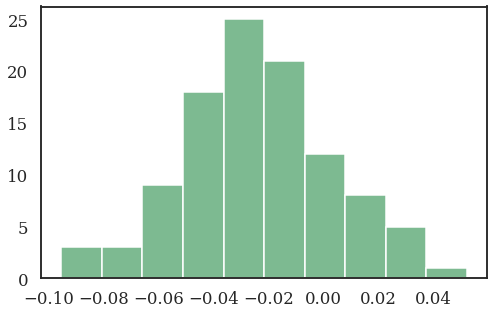

In [389]:
scalar_projections = get_projections(agree_disagree, test_transcript.segment_vectors)
plt.hist(scalar_projections)
np.array(test_transcript.data['text_chunks'])[np.argsort(scalar_projections)]

In [391]:
# on dog disagreement episode
PROJECTION_THRESHOLD = 0
y_test_pred = (scalar_projections < PROJECTION_THRESHOLD)
print(classification_report(y_test[-25:], y_test_pred[-25:]))
print(f"Predicted: {sum(y_test_pred[-25:])}")
print(f"Actual: {sum(y_test[-25:])}")

              precision    recall  f1-score   support

           0       0.75      0.16      0.26        19
           1       0.24      0.83      0.37         6

    accuracy                           0.32        25
   macro avg       0.49      0.50      0.32        25
weighted avg       0.63      0.32      0.29        25

Predicted: 21
Actual: 6


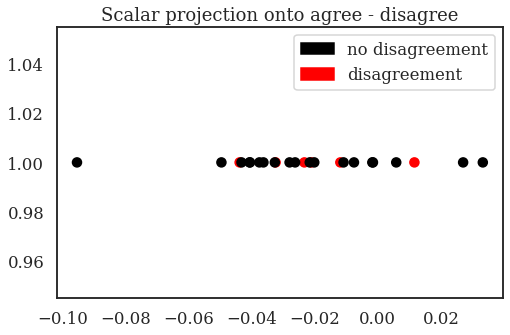

In [392]:
label_colors = np.array(['black', 'red'])
label_legend = ['no disagreement', 'disagreement']
title = 'Scalar projection onto agree - disagree'
text_labels = test_transcript.data['text_chunks'][-25:]
plt.scatter(scalar_projections[-25:], 
            [1] * len(scalar_projections[-25:]),
            c = label_colors[y_test[-25:]])

patches = []
for idx, l in enumerate(label_colors):
    patch = mpatches.Patch(color=label_colors[idx], label=label_legend[idx])
    patches.append(patch)
plt.legend(handles=patches)
plt.title(title);
# for i, txt in enumerate(text_labels):
#     plt.annotate('\n'.join([txt[:30][i:i+10] for i in range(0, 30, 10)]), 
#                  (scalar_projections[-25:][i], 1), fontsize = 8);

In [393]:
# on other annotated episode
scalar_projections = get_projections(agree_disagree, train_transcript.segment_vectors)
y_train_pred = (scalar_projections < PROJECTION_THRESHOLD)
print(classification_report(y_train, y_train_pred))
print(f"Predicted: {sum(y_train_pred)}")
print(f"Actual: {sum(y_train)}")

              precision    recall  f1-score   support

           0       0.61      0.12      0.20        91
           1       0.08      0.50      0.14        14

    accuracy                           0.17       105
   macro avg       0.35      0.31      0.17       105
weighted avg       0.54      0.17      0.19       105

Predicted: 87
Actual: 14


# Appendix

### Side exploration: logistic regression on lexicon count matrices

In [191]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
lm.predict(X_test)
print(classification_report(lm.predict(X_train), y_train))
print(classification_report(lm.predict(X_test), y_test))